In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import pandas as pd

In [60]:
logs = []
with open('./results/analysis_stats.json','r') as file: 
    records = file.read().split('\n')
    for record in records[:-1]:
        logs.append(json.loads(record))
    print(logs)

[{'B': ['Avg STD', 2.2966507177033493]}, {'PE': ['Avg STD', 2.3444976076555024]}, {'SBOW': ['Avg STD', 3.5526315789473686]}, {'DBOW': ['Avg STD', 6.471291866028708]}, {'NWD': ['Avg STD', 5.490430622009569]}, {'NWBOW': ['Avg STD', 5.956937799043062]}, {'B': ['Avg SQ', 80.25507246376812]}, {'PE': ['Avg SQ', 81.18192918192918]}, {'SBOW': ['Avg SQ', 77.46735751295337]}, {'DBOW': ['Avg SQ', 68.50671140939598]}, {'NWD': ['Avg SQ', 61.758893280632414]}, {'NWBOW': ['Avg SQ', 73.99876084262701]}, {'B': [4.738776594650206, 21.412037037037038, 94.14660493827161]}, {'PE': [1.101664531893004, 4.932098765432099, 13.358024691358025]}, {'SBOW': [1.7898406378600824, 6.0092592592592595, 33.99074074074074]}, {'DBOW': [3.9208554353426073, 17.216383307573416, 86.98145285935085]}, {'NWBOW': [2.1982777777777778, 17.395061728395063, 99.62345679012346]}, {'NWD': [1.7862921840958605, 16.029411764705884, 92.81372549019608]}, {'B': [0.0]}, {'PE': [0.0]}, {'SBOW': [0.9084078711985689]}, {'DBOW': [0.111676973444889

   Interface              Metric      Value
0          B             Avg STD   2.296651
1         PE             Avg STD   2.344498
2       SBOW             Avg STD   3.552632
3       DBOW             Avg STD   6.471292
4        NWD             Avg STD   5.490431
5      NWBOW             Avg STD   5.956938
6          B              Avg SQ  80.255072
7         PE              Avg SQ  81.181929
8       SBOW              Avg SQ  77.467358
9       DBOW              Avg SQ  68.506711
10       NWD              Avg SQ  61.758893
11     NWBOW              Avg SQ  73.998761
12         B            avg_time   4.738777
13         B            avg_nobp   2.141204
14         B              avg_ks   9.414660
15        PE            avg_time   1.101665
16        PE            avg_nobp   0.493210
17        PE              avg_ks   1.335802
18      SBOW            avg_time   1.789841
19      SBOW            avg_nobp   0.600926
20      SBOW              avg_ks   3.399074
21      DBOW            avg_time

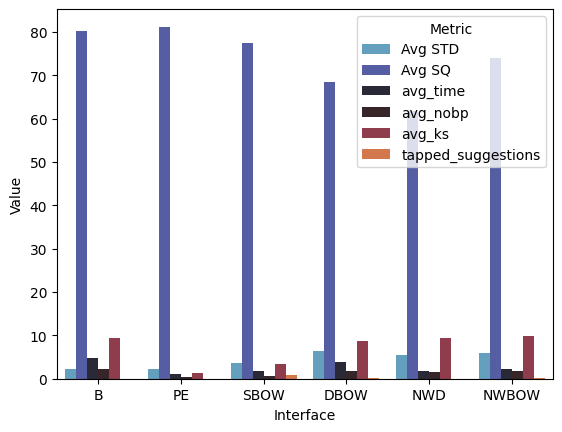

In [61]:
rows = []
tapped_rows = []
avg_SQ = []
avg_STD = []
for log in logs: 
    for key in log: 
        if len(log[key])==3:
            rows.append([key, 'avg_time',log[key][0]])
            rows.append([key, 'avg_nobp',log[key][1]/10])
            rows.append([key, 'avg_ks',log[key][2]/10])
        elif len(log[key]) == 1:
            rows.append([key, 'tapped_suggestions',log[key][0]])
        elif len(log[key]) == 2 and log[key][0] == 'Avg SQ':
            tapped_rows.append([key, 'Avg SQ',log[key][1]])
            rows.append([key, 'Avg SQ',log[key][1]])
        elif len(log[key]) == 2 and log[key][0] == 'Avg STD':
            tapped_rows.append([key, 'Avg STD',log[key][1]])
            rows.append([key, 'Avg STD',log[key][1]])
df = pd.DataFrame(rows, columns = ['Interface', 'Metric', 'Value'])
print(df)
plot = sns.barplot(df, x = 'Interface', y = 'Value', hue = 'Metric', errorbar = 'sd', palette= 'icefire')


<Axes: xlabel='Interface', ylabel='Tapped Idx'>

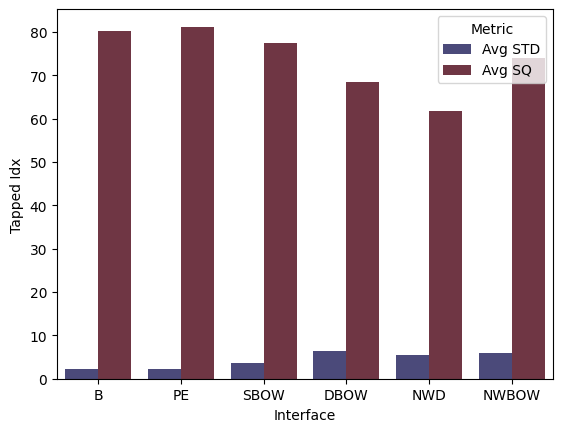

In [62]:
tapped_df = pd.DataFrame(tapped_rows, columns = ['Interface','Metric','Tapped Idx'])
sns.barplot(tapped_df, x = 'Interface', y = 'Tapped Idx', hue = 'Metric', errorbar = 'sd', palette = 'icefire')

Past palletes - "GnBu_d", "coolwarm"

In [24]:
rows

[['B', 'Avg STD', 2.2966507177033493],
 ['PE', 'Avg STD', 2.3444976076555024],
 ['SBOW', 'Avg STD', 3.5526315789473686],
 ['DBOW', 'Avg STD', 6.471291866028708],
 ['NWD', 'Avg STD', 5.490430622009569],
 ['NWBOW', 'Avg STD', 5.956937799043062],
 ['NWD', 'Avg SQ', 61.758893280632414],
 ['NWBOW', 'Avg SQ', 73.99876084262701],
 ['DBOW', 'Avg SQ', 68.50671140939598],
 ['SBOW', 'Avg SQ', 77.46735751295337],
 ['B', 'Avg SQ', 80.25507246376812],
 ['PE', 'Avg SQ', 81.18192918192918],
 ['B', 'avg_time', 4.738776594650206],
 ['B', 'avg_nobp', 2.1412037037037037],
 ['B', 'avg_ks', 9.41466049382716],
 ['PE', 'avg_time', 1.101664531893004],
 ['PE', 'avg_nobp', 0.4932098765432099],
 ['PE', 'avg_ks', 1.3358024691358026],
 ['SBOW', 'avg_time', 1.7898406378600824],
 ['SBOW', 'avg_nobp', 0.600925925925926],
 ['SBOW', 'avg_ks', 3.399074074074074],
 ['DBOW', 'avg_time', 3.9208554353426073],
 ['DBOW', 'avg_nobp', 1.7216383307573415],
 ['DBOW', 'avg_ks', 8.698145285935086],
 ['NWBOW', 'avg_time', 2.198277777

In [26]:
print(avg_time)

[['B', 4.738776594650206], ['PE', 1.101664531893004], ['SBOW', 1.7898406378600824], ['DBOW', 3.9208554353426073], ['NWBOW', 2.1982777777777778], ['NWD', 1.7862921840958605]]


In [47]:
print(avg_sq)

[['NWD', 61.758893280632414], ['NWBOW', 73.99876084262701], ['DBOW', 68.50671140939598], ['SBOW', 77.46735751295337], ['B', 80.25507246376812], ['PE', 81.18192918192918]]


,Interface,Value
0,NWD,61.758893
1,NWBOW,73.998761
2,DBOW,68.506711
3,SBOW,77.467358
4,B,80.255072
5,PE,81.181929


[Text(0, 0, 'B'), Text(1, 0, 'PE'), Text(2, 0, 'SBOW'), Text(3, 0, 'DBOW'), Text(4, 0, 'NWD'), Text(5, 0, 'NWBOW')]


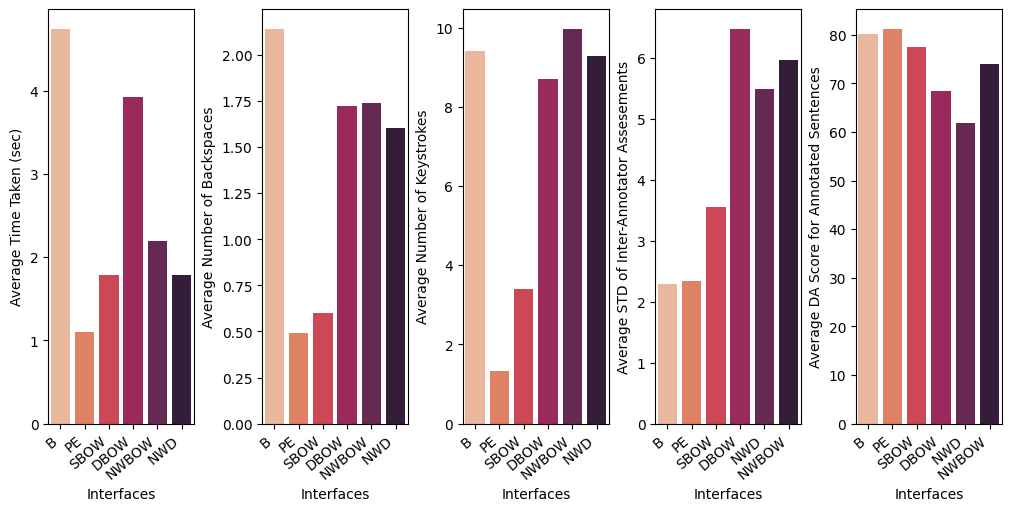

In [63]:
avg_time, avg_nobp, avg_ks, avg_std, avg_sq = [],[],[],[],[]
group_by_metric = []
for row in rows: 
    if row[1] == 'avg_time':
        avg_time.append([row[0], row[2]])
    elif row[1] == 'avg_nobp':
        avg_nobp.append([row[0], row[2]])
    elif row[1] == 'avg_ks':
        avg_ks.append([row[0], row[2]])
    elif row[1] == 'Avg SQ':
        avg_sq.append([row[0], row[2]])
    elif row[1] == 'Avg STD':
        avg_std.append([row[0], row[2]])    
adf = pd.DataFrame(avg_time, columns = ['Interface', 'Value'])
bdf = pd.DataFrame(avg_nobp, columns = ['Interface', 'Value'])
cdf = pd.DataFrame(avg_ks, columns = ['Interface', 'Value'])
ddf = pd.DataFrame(avg_std, columns = ['Interface', 'Value'])
edf = pd.DataFrame(avg_sq, columns = ['Interface', 'Value'])

fig, axes = plt.subplots(1, 5, figsize=(10,5), constrained_layout = True)
sns.barplot(data = adf, x='Interface', y = 'Value',  ax=axes[0], palette = 'rocket_r')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set(ylabel='Average Time Taken (sec)', xlabel='Interfaces')

sns.barplot(data = bdf, x='Interface', y = 'Value',  ax=axes[1], palette = 'rocket_r')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
axes[1].set(ylabel='Average Number of Backspaces', xlabel='Interfaces')

sns.barplot(data = cdf, x='Interface', y = 'Value',  ax=axes[2], palette = 'rocket_r')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")
axes[2].set(ylabel='Average Number of Keystrokes', xlabel='Interfaces')

sns.barplot(data = ddf, x='Interface', y = 'Value',  ax=axes[3], palette = 'rocket_r')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=40, ha="right")
axes[3].set(ylabel='Average STD of Inter-Annotator Assesements', xlabel='Interfaces')

sns.barplot(data = edf, x='Interface', y = 'Value',  ax=axes[4], palette = 'rocket_r')
print(axes[4].get_xticklabels())
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=40, ha="right")
axes[4].set(ylabel='Average DA Score for Annotated Sentences', xlabel='Interfaces')
plt.savefig('./results/plots/keystroke_analysis.png')
